Repair

# Cleaning

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings
from sklearn.utils import shuffle
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the dataframe from a csv file
df = pd.read_csv('train.csv', delimiter=';')


In [4]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [5]:
# Replace the values in the target column with string '0' and '1'.
df['y'] = df['y'].str.replace('no', '0')  
df['y'] = df['y'].str.replace('yes', '1')   

# Convert to integer
df['y'] = df['y'].astype(int)

In [6]:

# Dropping the rows with NaN values 
df.dropna( inplace=True)

# Plots for creating feature importance plot

In [7]:
auc_df = pd.read_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_Results .xlsx')
auc_onlycf_df = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_only_with_cfs_Results .xlsx')

In [9]:
auc_df.head(10)

,Unnamed: 0,Model,Iteration,Sample Size,CF Num,X_fit Size,F1 (%),F1 (%)_std,AUC (%),AUC (%)_std
0,0,RF_default_mean_of_iterations,5,0,0,31647,0.508861,0.004065,0.693862,0.002404
1,1,RF_simp_def_1_mean_of_iterations,5,0,0,31647,0.227154,0.006185,0.564116,0.002030
2,2,RF_simp_def_2_mean_of_iterations,5,0,0,31647,0.011234,0.009072,0.502757,0.002259
3,3,RF_simp_1_sample:3164_cf:1_mean_of_5_iterations,5,3164,1,34811,0.137226,0.047507,0.536800,0.013906
4,4,RF_simp_2_sample:3164_cf:1_mean_of_5_iterations,5,3164,1,34811,0.000000,0.000000,0.500000,0.000000
5,5,RF_simp_1_sample:3164_cf:2_mean_of_5_iterations,5,3164,2,37975,0.018516,0.008122,0.504590,0.002020
6,6,RF_simp_2_sample:3164_cf:2_mean_of_5_iterations,5,3164,2,37975,0.000000,0.000000,0.500000,0.000000
7,7,RF_simp_1_sample:6328_cf:1_mean_of_5_iterations,5,6328,1,37975,0.112489,0.050649,0.529800,0.014428
8,8,RF_simp_2_sample:6328_cf:1_mean_of_5_iterations,5,6328,1,37975,0.004197,0.006489,0.501057,0.001637
9,9,RF_simp_1_sample:6328_cf:2_mean_of_5_iterations,5,6328,2,44303,0.031849,0.004717,0.507900,0.001158


In [10]:
# Get the AUC score for the LR default model
lr_default_auc_1 =  auc_df[auc_df['Model'].str.startswith('RF_simp_def_1')]['AUC (%)'].iloc[0]
auc_scores_1 = auc_df[auc_df['Model'].str.startswith('RF_simp_1_sample:')]['AUC (%)'].tolist()


# Get the AUC score for the LR default model
lr_default_auc_2 =  auc_df[auc_df['Model'].str.startswith('RF_simp_def_2')]['AUC (%)'].iloc[0]
auc_scores_2 = auc_df[auc_df['Model'].str.startswith('RF_simp_2_sample:')]['AUC (%)'].tolist()

rf_default_auc =  auc_df[auc_df['Model'].str.startswith('RF_default')]['AUC (%)'].iloc[0]


In [11]:
from scipy.stats import ks_2samp
import pandas as pd

def ks_test_all_features(original_df, cf_df):
    results = {}
    # Iterate over columns in the original dataframe
    for column in original_df.columns:
        # Check if the column exists in the counterfactual dataframe and both columns are not empty
            # Apply the KS test
        stat, p_value = ks_2samp(original_df[column].dropna(), cf_df[column].dropna())
        results[column] = {'KS Statistic': stat}

    return results



In [12]:
list_1 = [3164, 6328, 9492]
list_2 = [1, 2]

list_3 = [1,2,3,4,5] #iterations

In [13]:
ks_results_list = [] 
for i in list_1:
    for t in list_2:
        for z in list_3:
            df_cf = pd.read_csv('Generated_CFs/cf_df_{}_{}_{}.csv'.format(i,t, z), index_col=0)
            start_index = 1 + len(df)  # Calculate the starting index
            new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
            df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
            df_cf_reset.index = new_index  # Set the new index
            df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
            ks_results = ks_test_all_features(df, df_cf)
            ks_results_df = pd.DataFrame(ks_results).T
            mean_ks_statistic = ks_results_df['KS Statistic'].mean()
            ks_results_list.append(mean_ks_statistic)

getting the average of every iteration

In [14]:
# Create a new list that gets the means of every 5 number
new_list = [(ks_results_list[i] + ks_results_list[i + 1]+ ks_results_list[i + 2] + ks_results_list[i + 3] + ks_results_list[i + 4] ) / 5 for i in range(0, len(ks_results_list) - 1, 5)]


# Print the new list
print(new_list)
ks_results_list = new_list.copy()

[0.10809050958843539, 0.10825275504295842, 0.10307098961183828, 0.10359810841875614, 0.10139183081140668, 0.1014795889685978]


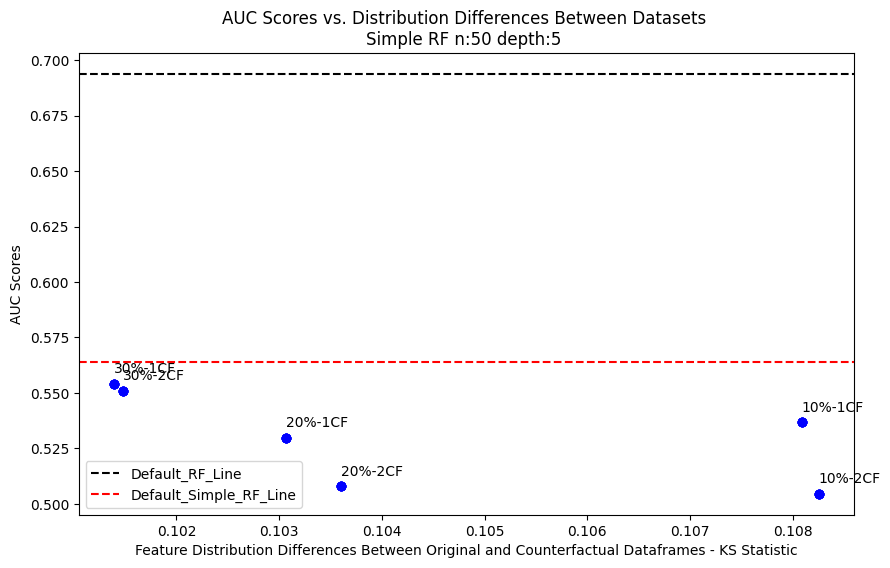

In [15]:

labels = ['10%-1CF', '10%-2CF', '20%-1CF', '20%-2CF', '30%-1CF', '30%-2CF']

# Show the plot
plt.figure(figsize=(10, 6))

# Plotting AUC differences
for i, label in enumerate(labels):
    plt.scatter(ks_results_list, auc_scores_1, color='blue')  # You can customize the color and marker
    plt.annotate(label, (ks_results_list[i], auc_scores_1[i]),
                 textcoords="offset points", xytext=(0,8), ha='left')


plt.axhline(y=rf_default_auc, color='k', linestyle='--', label="Default_RF_Line")  # Plot RF_line as a horizontal line
plt.axhline(y=lr_default_auc_1, color='r', linestyle='--', label="Default_Simple_RF_Line")  # Plot RF_line as a horizontal line

# Add labels, title, and legend
plt.title('AUC Scores vs. Distribution Differences Between Datasets \nSimple RF n:50 depth:5 ')
plt.xlabel('Feature Distribution Differences Between Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Scores')
plt.legend()

# Show the plot
plt.show()


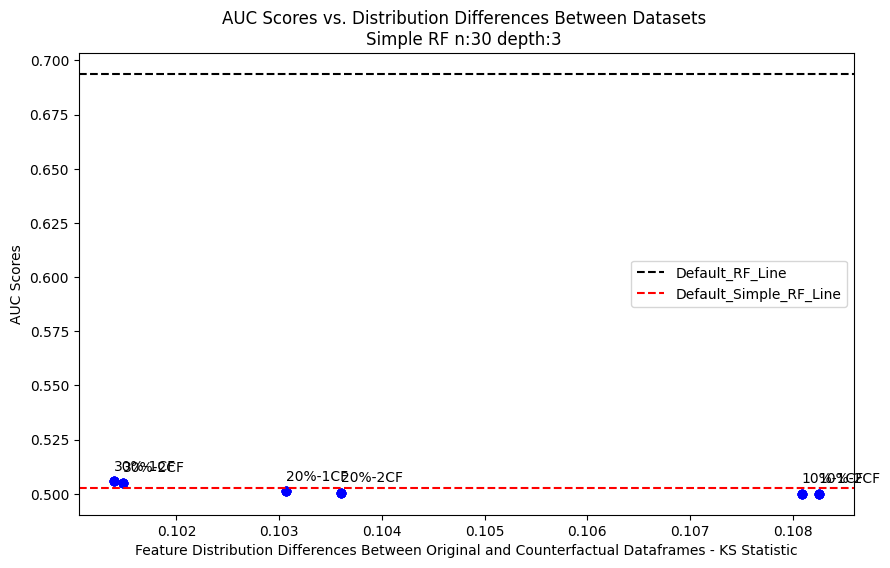

In [16]:

# Show the plot
plt.figure(figsize=(10, 6))

# Plotting AUC differences
for i, label in enumerate(labels):
    plt.scatter(ks_results_list, auc_scores_2, color='blue')  # You can customize the color and marker
    plt.annotate(label, (ks_results_list[i], auc_scores_2[i]),
                 textcoords="offset points", xytext=(0,8), ha='left')


plt.axhline(y=rf_default_auc, color='k', linestyle='--', label="Default_RF_Line")  # Plot RF_line as a horizontal line
plt.axhline(y=lr_default_auc_2, color='r', linestyle='--', label="Default_Simple_RF_Line")  # Plot RF_line as a horizontal line

# Add labels, title, and legend
plt.title('AUC Scores vs. Distribution Differences Between Datasets \nSimple RF n:30 depth:3 ')
plt.xlabel('Feature Distribution Differences Between Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Scores')
plt.legend()

# Show the plot
plt.show()


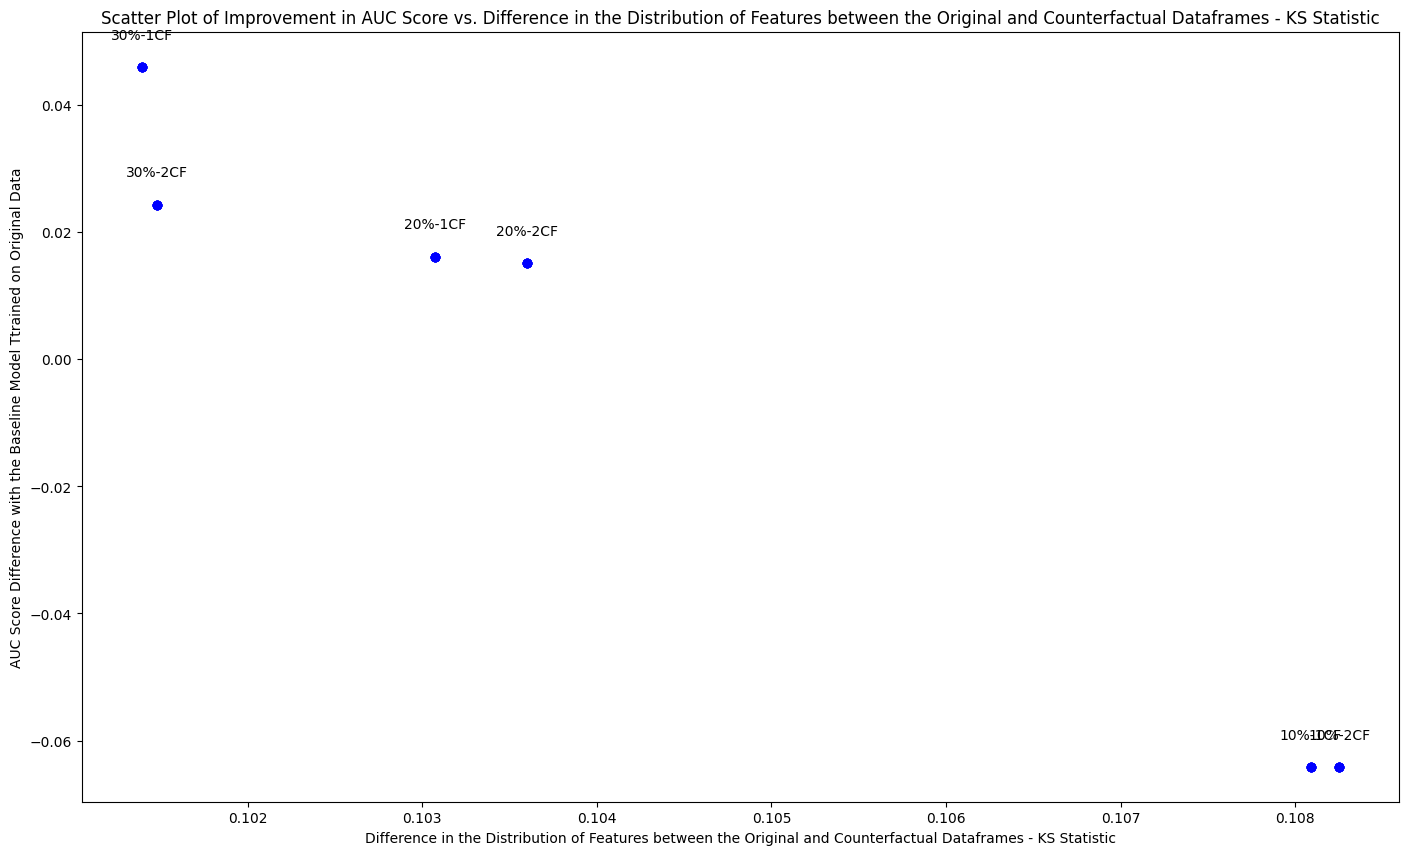

In [20]:


# Show the plot
plt.figure(figsize=(17, 10))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, auc_diff_cf_1, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], auc_diff_cf_1[i]),
                 textcoords="offset points", xytext=(0,20), ha='center')
plt.title('Scatter Plot of Improvement in AUC Score vs. Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference with the Baseline Model Ttrained on Original Data')
plt.show()

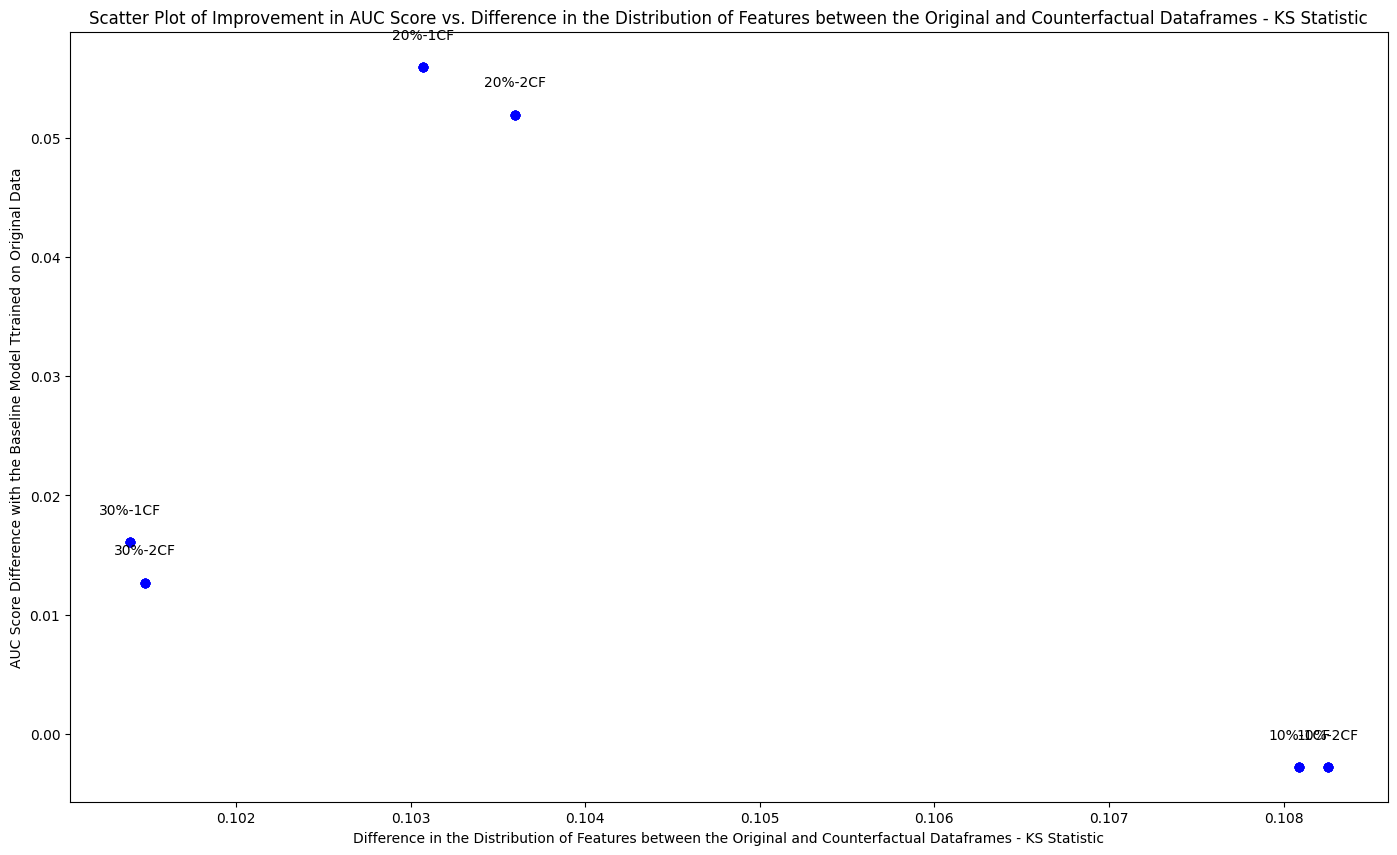

In [21]:

# Show the plot
plt.figure(figsize=(17, 10))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, auc_diff_cf_2, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], auc_diff_cf_2[i]),
                 textcoords="offset points", xytext=(0,20), ha='center')
plt.title('Scatter Plot of Improvement in AUC Score vs. Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference with the Baseline Model Ttrained on Original Data')
plt.show()